### Predicting the stock market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#### Load data

In [2]:
data = pd.read_csv("sphist.csv")

data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date', ascending = True)
data.reset_index(inplace=True, drop=True)
print(data.head())


        Date   Open   High    Low  Close     Volume  Adj Close
0 1950-01-03  16.66  16.66  16.66  16.66  1260000.0      16.66
1 1950-01-04  16.85  16.85  16.85  16.85  1890000.0      16.85
2 1950-01-05  16.93  16.93  16.93  16.93  2550000.0      16.93
3 1950-01-06  16.98  16.98  16.98  16.98  2010000.0      16.98
4 1950-01-09  17.08  17.08  17.08  17.08  2520000.0      17.08


#### Caclulate Average of 5 Days, 30 days, and 365 days

In [3]:
data['day_5']=0
data['day_30']=0
data['day_365']=0
avg_dict = [{5:'day_5'},{30:'day_30'}, {365:'day_365'}]
for p in avg_dict:
    k = list(p)[0]
    item = p[k]
    for i in range(len(data)):
        if i < k:
            data.loc[i, item] = data.loc[i, 'Close']
        else:
            data.loc[i, item] = data.loc[i-k:i, 'Close'].mean()

#### Caclulate Standard deviation of 5 Days, 30 days, and 365 days

In [4]:
data['day_5_std']=0
data['day_30_std']=0
data['day_365_std']=0
std_dict = [{6:'day_5_std'},{31:'day_30_std'}, {366:'day_365_std'}]
for p in std_dict:
    k = list(p)[0]
    item = p[k]
    for i in range(len(data)):
        if i < k:
            data.loc[i, item] = data.loc[i, 'Close']
        else:
            data.loc[i, item] = data.loc[i-k:i, 'Close'].mean()

#print(data.head(20))

#### Create components for Year, Month, Day of week, Week of year

In [5]:
# Year component
data['Year'] = data['Date'].apply(lambda x: x.strftime('%Y'))
data['Year'] = data['Year'].astype(int)
# Month component
data['Month'] = data['Date'].apply(lambda x: x.strftime('%m'))
data['Month'] = data['Month'].astype(int)
# Day of week component
data['Dow'] = data['Date'].apply(lambda x: x.strftime('%w'))
data['Dow'] = data['Dow'].astype(int)
# Week of year component
data['Woy'] = data['Date'].apply(lambda x: x.strftime('%U'))
data['Woy'] = data['Woy'].astype(int)

In [6]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_30,day_365,day_5_std,day_30_std,day_365_std,Year,Month,Dow,Woy
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,16.66,16.66,16.66,16.66,16.66,16.66,1950,1,2,1
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,16.85,16.85,16.85,16.85,16.85,16.85,1950,1,3,1
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,16.93,16.93,16.93,16.93,16.93,16.93,1950,1,4,1
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,16.98,16.98,16.98,16.98,16.98,16.98,1950,1,5,1
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,17.08,17.08,17.08,17.08,17.08,17.08,1950,1,1,2


Select date over 1951-1-2 and drop any null value

In [7]:
data_new = data[data["Date"] > datetime(year=1951, month=1, day=2)]
data_new.dropna(axis=0, inplace=True)
print(data_new.isnull().values.any())

False


C:\Users\mbelkhei\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### split 70/30

In [19]:
data['Date'].ix[int(0.7*len(data))]

Timestamp('1996-03-01 00:00:00')

In [9]:
train = data_new[data_new["Date"] < datetime(year= 1996, month=3, day=1)]
test = data_new[data_new["Date"] >= datetime(year= 1996, month=3, day=1)]

y_train= train['Close']
y_test = test['Close']
train_bis = train[train.columns.tolist()[7:]]
test_bis = test[test.columns.tolist()[7:]]


#### Train and predict

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_bis.values, y_train.values)
predict = lr.predict(test_bis)

#### Use mean absolute error as metric to evaluate performance of our model

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
perf = 100-mean_absolute_error(test['Close'].values, predict)
print(perf)

89.0198766529


In [ ]:
test['predicted_close'] = predict.tolist()

In [16]:
from sklearn.metrics import r2_score

# how well our model would do on future unseen data
r2_score(test['Close'].values, predict) 

0.99791643217079118

In [17]:
import numpy as np
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lr.predict(test_bis) - test['Close']) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(test_bis, y_test))

('Coefficients: \n', array([  3.59858586e+00,   3.05873558e-02,  -1.10023642e+00,
        -2.60841538e+00,  -2.02348587e-02,   1.10062274e+00,
        -5.81337903e-04,   4.23894082e-03,   2.36249611e-02,
        -1.91150266e-03]))
Mean squared error: 230.26
Variance score: 1.00


#### plot actual and predicted values of close

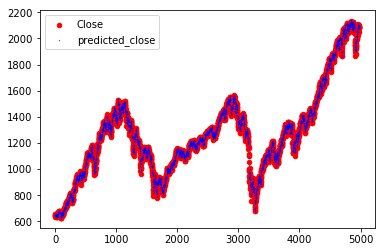

In [18]:
plt.scatter(range(len(test)),test['Close'], c='r', s=20)
plt.scatter(range(len(test)),test['predicted_close'], c='b', s=0.1)
plt.legend()
plt.show()